# Jugo project

## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.

In [83]:
import warnings
warnings.simplefilter("ignore")


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

### Weather station data in the Netherlands

In [84]:
import pandas as pd

df = pd.read_parquet('datasets/part-00000-tid-2789511524578721898-08cae995-4879-40e6-b739-92aa0f67bfaa-404-1-c000.snappy.parquet')

df.shape 

(19188675, 25)

In [85]:
df.sample(10)

,STN,YYYYMMDD,H,DD,FH,FF,FX,T,T10N,TD,...,VV,N,U,WW,IX,M,R,S,O,Y
9051925,286,20221225,14,160,20,30,40,86,,79,...,,,95,,6,,,,,
3956574,316,20031223,7,210,90,90,120,,,,...,,,,,6,,,,,
10163899,380,20010113,20,60,60,50,100,-7,,-40,...,63,1,76,,2,0,0,0,0,
14397913,308,19840912,5,270,113,113,144,,,,...,,,,,,,,,,
9218848,323,20230525,17,360,60,60,100,153,,84,...,,,63,,6,,,,,
9132795,340,20230308,4,110,20,10,30,10,,7,...,12,8,98,20,7,1,0,0,0,0
134199,285,20060528,16,280,100,100,130,,,,...,,,,,6,,,,,
12505415,380,19911219,24,260,62,62,108,56,50,42,...,80,6,91,1,,0,0,0,0,0
1741912,235,20130319,17,70,70,70,100,28,,-6,...,60,8,78,,5,0,0,0,0,0
12204046,269,19931201,23,190,67,77,98,14,,10,...,95,,97,,,,,,,


Identifying unique values helps understand the range and type of data in each column. This insight is crucial for determining the kind of preprocessing needed. 

In [86]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'STN': ['  209' '  210' '  225' '  235' '  240' '  242' '  248' '  249' '  251'
 '  257' '  258' '  260' '  265' '  267' '  269' '  270' '  273' '  275'
 '  277' '  278' '  279' '  280' '  283' '  285' '  286' '  290' '  308'
 '  310' '  311' '  312' '  313' '  315' '  316' '  319' '  324' '  330'
 '  331' '  340' '  343' '  344' '  348' '  350' '  356' '  370' '  375'
 '  377' '  380' '  391' '  323' '  215']
Column 'YYYYMMDD': ['20060201' '20060202' '20060203' ... '19510129' '19510130' '19510131']
Column 'H': ['    1' '    2' '    3' '    4' '    5' '    6' '    7' '    8' '    9'
 '   10' '   11' '   12' '   13' '   14' '   15' '   16' '   17' '   18'
 '   19' '   20' '   21' '   22' '   23' '   24']
Column 'DD': ['  100' '  120' '   90' '  110' '  220' '  350' '  150' '  190' '  240'
 '  200' '  260' '  250' '  300' '  330' '   80' '   70' '  140' '  130'
 '  990' '  160' '  270' '  290' '  180' '    0' '  230' '  310' '  320'
 '  170' '  340' '  360' '   50' '   40' '  210'

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 25 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   STN       object
 1   YYYYMMDD  object
 2   H         object
 3   DD        object
 4   FH        object
 5   FF        object
 6   FX        object
 7   T         object
 8   T10N      object
 9   TD        object
 10  SQ        object
 11  Q         object
 12  DR        object
 13  RH        object
 14  P         object
 15  VV        object
 16  N         object
 17  U         object
 18  WW        object
 19  IX        object
 20  M         object
 21  R         object
 22  S         object
 23  O         object
 24  Y         object
dtypes: object(25)
memory usage: 3.6+ GB


By checking the data types in each column, we understand that each one is an object. Now, when we also can see each column name, we would suggest a name for each to each our work further. More research about the meanings would be done before the end of this iteration.

In [88]:
# column_name_mapping = {
#     'STN': 'Station ID',
#     'YYYYMMDD': 'Date (YYYY-MM-DD)',
#     'H': 'Hour',
#     'DD': 'Wind Direction (degrees)',
#     'FH': 'Hourly Average Wind Speed (m/s)',
#     'FF': 'Mean Wind Speed (m/s)',
#     'FX': 'Maximum Wind Speed (m/s)',
#     'T': 'Temperature (0.1°C)',
#     'T10N': 'Minimum Temperature at 10cm (0.1°C)',
#     'TD': 'Dew Point Temperature (0.1°C)',
#     'SQ': 'Sunshine Duration (hours)',
#     'Q': 'Global Radiation (J/cm²)',
#     'DR': 'Duration of Precipitation (hours)',
#     'RH': 'Precipitation Amount (mm)',
#     'P': 'Atmospheric Pressure (hPa)',
#     'VV': 'Visibility (m)',
#     'N': 'Cloud Cover (oktas)',
#     'U': 'Relative Humidity (%)',
#     'WW': 'Present Weather',
#     'IX': 'Weather Station Type',
#     'M': 'Moon Phase',
#     'R': 'Rainfall Indicator',
#     'S': 'Snow Indicator',
#     'O': 'Fog Indicator',
#     'Y': 'Ice Formation Indicator'
# }

# df.rename(columns=column_name_mapping, inplace=True)
# df.sample(10)

column_name_mapping = {
    'STN': 'Station ID',
    'YYYYMMDD': 'Date (YYYY-MM-DD)',
    'H': 'Hour',
    'DD': 'Wind Direction (degrees)',
    'FH': 'Hourly Average Wind Speed (m/s)',
    'FF': 'Wind Speed (m/s)',
    'FX': 'Highest Wind Gust (m/s) ',
    'T': 'Temperature (0.1°C)',
    'T10N': 'Minimum Temperature at 10cm (0.1°C)',
    'TD': 'Dew Point Temperature (0.1°C)',
    'SQ': 'Sunshine Duration (hours)',
    'Q': 'Global Radiation (J/cm²)',
    'DR': 'Duration of Precipitation (hours)',
    'RH': 'Precipitation Amount (mm)',
    'P': 'Atmospheric Pressure (hPa)',
    'VV': 'Visibility (m)',
    'N': 'Cloud Cover (oktas)',
    'U': 'Relative Humidity (%)',
    'WW': 'Weather Code',
    'IX': 'Weather Station Type',
    'M': 'Fog Indicator',
    'R': 'Rainfall Indicator',
    'S': 'Snow Indicator',
    'O': 'Thunderstorm Indicator',
    'Y': 'Ice Formation Indicator'
}

df.rename(columns=column_name_mapping, inplace=True)
df.sample(10)

,Station ID,Date (YYYY-MM-DD),Hour,Wind Direction (degrees),Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Minimum Temperature at 10cm (0.1°C),Dew Point Temperature (0.1°C),...,Visibility (m),Cloud Cover (oktas),Relative Humidity (%),Weather Code,Weather Station Type,Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
7793496,315,20161023,1,70,30,30,40,,,,...,,,,,6,,,,,
18601226,210,19530729,24,230,,41,,159,,134,...,,6,85,3,,0,0,0,0,0
9804553,269,20000216,2,180,40,40,60,44,,35,...,60,,94,,6,,,,,
7401097,273,20200625,2,70,30,30,40,154,,125,...,70,,82,,5,0,0,0,0,0
8844291,280,20220620,4,260,20,20,30,88,,84,...,65,0,96,,5,0,0,0,0,0
15974478,375,19771027,10,130,21,21,26,91,,88,...,8,8,98,42,,1,0,0,0,0
9521889,257,20240224,10,,,,,60,,27,...,,,79,,6,,,,,
3882047,311,20031018,24,70,70,70,90,,,,...,,,,,6,,,,,
8396043,279,20210510,4,150,30,30,50,174,,118,...,80,8,69,,5,0,0,0,0,0
3691900,210,20030503,5,250,120,120,190,101,,73,...,63,8,83,,5,0,0,0,0,0


After the research some of our group members conducted, we decided to drop the following columns as their information is irrelevant to our goal - "Duration of traffic jam".

In [89]:
columns_to_drop = ['Wind Direction (degrees)', 'Minimum Temperature at 10cm (0.1°C)', 'Sunshine Duration (hours)',
                   'Global Radiation (J/cm²)', 'Atmospheric Pressure (hPa)', 'Cloud Cover (oktas)',
                   'Relative Humidity (%)', 'Dew Point Temperature (0.1°C)',
                  'Wind Speed (m/s)', 'Weather Station Type']

df.drop(columns=columns_to_drop, inplace=True)
df

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Weather Code,Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
0,209,20060201,1,40,50,,,,,,,,,,
1,209,20060201,2,40,60,,,,,,,,,,
2,209,20060201,3,30,50,,,,,,,,,,
3,209,20060201,4,20,40,,,,,,,,,,
4,209,20060201,5,20,40,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19188670,380,19510131,20,0,,20,,,,44,1,0,0,0,0
19188671,380,19510131,21,0,,20,,,,44,1,0,0,0,0
19188672,380,19510131,22,0,,19,,,,45,1,0,0,0,0
19188673,380,19510131,23,0,,18,,,,47,1,0,0,0,0


Now, after seeing that the columns are in the wrong data type and after removing some columns, let's also check the explicitly missing values.

In [90]:
df.isna().sum()

Station ID                           0
Date (YYYY-MM-DD)                    0
Hour                                 0
Hourly Average Wind Speed (m/s)      0
Highest Wind Gust (m/s)              0
Temperature (0.1°C)                  0
Duration of Precipitation (hours)    0
Precipitation Amount (mm)            0
Visibility (m)                       0
Weather Code                         0
Fog Indicator                        0
Rainfall Indicator                   0
Snow Indicator                       0
Thunderstorm Indicator               0
Ice Formation Indicator              0
dtype: int64

While we seem to **not have missing data**, based on the NAs check, there are actually **empty strings** in the columns. Therefore, we need to first clean the empty strings, before changing the data types and proceeding further.

Because of the invisible NAs, we decided to convert all of the columns to numeric type and wherever we got an error (which is the actual incinsistency of the data), we **converted it to NA** in order to make the issue visible.

In [91]:
#Changing the date to date format
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'], format='%Y%m%d')

#Making the hour an integer
df['Hour'] = df['Hour'].astype(int)

#Making the station ID an integer
df['Station ID'] = df['Station ID'].astype(int)

#Converting all of the other columns into numeric values and substituting errors with NAs
columns_to_convert = [
    'Hourly Average Wind Speed (m/s)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Weather Code',
    'Rainfall Indicator',
    'Snow Indicator',
    'Thunderstorm Indicator',
    'Fog Indicator',
    'Ice Formation Indicator'
]

#Looping through the list of columns
for column in columns_to_convert:
#Checking also for trailing and leading empty spaces, before replacing errors with NAs
    if df[column].dtype != 'object':
        df[column] = df[column].astype(str)
    
    df[column] = df[column].str.replace(r'\D', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

#Checking the final result
df.sample(10)

,Station ID,Date (YYYY-MM-DD),Hour,Hourly Average Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Weather Code,Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
14235123,260,1983-11-09,7,10.0,15,62,0.0,0.0,57.0,10.0,0.0,0.0,0.0,0.0,0.0
4954950,331,2007-09-15,7,10.0,10,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18303,356,2006-02-16,16,60.0,90,80,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4244008,285,2004-09-03,17,20.0,30,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5520256,370,2009-09-13,17,50.0,100,166,0.0,0.0,80.0,NaN,0.0,0.0,0.0,0.0,0.0
10305649,242,1997-10-12,2,90.0,150,117,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN
14830092,225,1982-09-23,16,113.0,180,,NaN,NaN,58.0,61.0,NaN,NaN,NaN,NaN,NaN
12569625,280,1992-03-05,10,31.0,51,107,0.0,0.0,45.0,10.0,0.0,0.0,0.0,0.0,0.0
4851176,331,2007-06-15,9,70.0,80,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11362867,308,1996-06-21,20,72.0,93,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the data type now to see if every column got updated properly.

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Station ID                         int64         
 1   Date (YYYY-MM-DD)                  datetime64[ns]
 2   Hour                               int64         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Highest Wind Gust (m/s)            object        
 5   Temperature (0.1°C)                object        
 6   Duration of Precipitation (hours)  float64       
 7   Precipitation Amount (mm)          float64       
 8   Visibility (m)                     float64       
 9   Weather Code                       float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

In [93]:
df['Temperature (0.1°C)'] = pd.to_numeric(df['Temperature (0.1°C)'], errors='coerce')

It seems that all of the data types are correct now. Let's also check the missing values again as now we expect to have many more than before:

In [94]:
df.isna().sum()

Station ID                                  0
Date (YYYY-MM-DD)                           0
Hour                                        0
Hourly Average Wind Speed (m/s)       2221137
Highest Wind Gust (m/s)                     0
Temperature (0.1°C)                   4152753
Duration of Precipitation (hours)     7516068
Precipitation Amount (mm)             7385292
Visibility (m)                        7268187
Weather Code                         10793640
Fog Indicator                         8264538
Rainfall Indicator                    8264516
Snow Indicator                        8264518
Thunderstorm Indicator                8264491
Ice Formation Indicator               8663080
dtype: int64

Just as we expected, we have many missing values as now the empty strings are replaced with NAs and can finally be visible. Now, let's see a description of the values in the dataset:

In [95]:
columns = [
    'Station ID',
    'Date (YYYY-MM-DD)',
    'Hour',
    'Hourly Average Wind Speed (m/s)',
    'Duration of Precipitation (hours)',
    'Precipitation Amount (mm)',
    'Visibility (m)',
    'Weather Code',
    'Rainfall Indicator',
    'Snow Indicator',
    'Fog Indicator',
    'Ice Formation Indicator',
    'Thunderstorm Indicator',
]

min_values = []
max_values = []
mean_values = []
median_values = []

for column in columns:
    min_values.append(df[column].min())
    max_values.append(df[column].max())
    mean_values.append(df[column].mean())
    median_values.append(df[column].median())

# Create a DataFrame with minimum and maximum values
weather_data_descr = pd.DataFrame({'Column': columns,
                        'Min Value': min_values,
                        'Mean Value': mean_values,
                        'Median Value': median_values,
                        'Max Value': max_values})
weather_data_descr

,Column,Min Value,Mean Value,Median Value,Max Value
0,Station ID,209,297.353128,286.0,391
1,Date (YYYY-MM-DD),1951-01-01 00:00:00,1997-01-09 01:39:42.260099072,2000-12-25 00:00:00,2024-03-25 00:00:00
2,Hour,1,12.500096,13.0,24
3,Hourly Average Wind Speed (m/s),0.0,50.865118,46.0,324.0
4,Duration of Precipitation (hours),0.0,0.727973,0.0,39.0
5,Precipitation Amount (mm),0.0,0.986595,0.0,790.0
6,Visibility (m),0.0,58.458932,62.0,99.0
7,Weather Code,0.0,19.508779,10.0,99.0
8,Rainfall Indicator,0.0,0.203906,0.0,11.0
9,Snow Indicator,0.0,0.017388,0.0,3.0


We will be using interpolation for filling the missing values for Present Weather. Interpolation is a technique used to fill in missing data points by estimating values based on surrounding data points. Now we will be using the `Date` as index to determine the interpolation using a time-based method, which means it's considering the dates when estimating the missing values.
https://www.youtube.com/watch?v=9ybI5YHPI5I

In [96]:
df.set_index('Date (YYYY-MM-DD)', inplace=True)
df.sort_values(by='Date (YYYY-MM-DD)', inplace=True)
df['Temperature (0.1°C)'].interpolate(method='time', inplace=True)

Make the indicators to be binary

In [97]:
columns_to_update = ['Rainfall Indicator', 'Snow Indicator', 'Fog Indicator', 'Thunderstorm Indicator', 'Ice Formation Indicator']

df[columns_to_update] = df[columns_to_update].applymap(lambda x: 1 if x > 1 else x)

Estimating and filling in missing values for rainfall, snow, and fog can be quite challenging. These weather parameters are often variable and localized, making them difficult to predict accurately. When data is missing for these variables, especially in a time-series dataset, it can be labor-intensive to manually check and fill in the values for each day.

Given the complexity and uncertainty involved in estimating these weather conditions, we have decided to adopt a conservative approach. In instances where data for rainfall, snow, or fog is missing, we will consider them as false, represented by a value of 0. While this approach may not capture the full variability of these weather phenomena, it allows us to maintain consistency and minimize potential errors in our analyses.

In [98]:
df['Rainfall Indicator'].fillna(0, inplace=True)
df['Snow Indicator'].fillna(0, inplace=True)
df['Fog Indicator'].fillna(0, inplace=True)
df['Thunderstorm Indicator'].fillna(0, inplace=True)

To ensure the accuracy of our weather data analysis, we employ time-based interpolation for the "Ice Formation Indicator." This specialized method leverages the temporal structure of our data to estimate missing values based on the progression of time. Time-based interpolation preserves the temporal continuity of our data, aligning interpolated values closely with the natural progression of weather conditions.

In [99]:
df['Ice Formation Indicator'].interpolate(method='time', inplace=True)

In [100]:
df.isna().sum()

Station ID                                  0
Hour                                        0
Hourly Average Wind Speed (m/s)       2221137
Highest Wind Gust (m/s)                     0
Temperature (0.1°C)                         0
Duration of Precipitation (hours)     7516068
Precipitation Amount (mm)             7385292
Visibility (m)                        7268187
Weather Code                         10793640
Fog Indicator                               0
Rainfall Indicator                          0
Snow Indicator                              0
Thunderstorm Indicator                      0
Ice Formation Indicator                     4
dtype: int64

In [101]:
rows_with_null_ice_formation = df[df['Ice Formation Indicator'].isna()]
rows_with_null_ice_formation

,Station ID,Hour,Hourly Average Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Weather Code,Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator
Date (YYYY-MM-DD),,,,,,,,,,,,,,
1951-01-01,380,23,98.0,,22.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1951-01-01,310,3,87.0,,14.0,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,NaN
1951-01-01,310,2,93.0,,11.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
1951-01-01,310,1,93.0,,9.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN


Because all the Temperatures are above 0, we can assume that there's no ice.

In [102]:
df['Ice Formation Indicator'].fillna(0, inplace=True)
df.isna().sum()

Station ID                                  0
Hour                                        0
Hourly Average Wind Speed (m/s)       2221137
Highest Wind Gust (m/s)                     0
Temperature (0.1°C)                         0
Duration of Precipitation (hours)     7516068
Precipitation Amount (mm)             7385292
Visibility (m)                        7268187
Weather Code                         10793640
Fog Indicator                               0
Rainfall Indicator                          0
Snow Indicator                              0
Thunderstorm Indicator                      0
Ice Formation Indicator                     0
dtype: int64

In [103]:
df['Hourly Average Wind Speed (m/s)'] = pd.to_numeric(df['Hourly Average Wind Speed (m/s)'], errors='coerce')
df['Visibility (m)'] = pd.to_numeric(df['Visibility (m)'], errors='coerce')

### Wind speed 

In [104]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 15 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Date (YYYY-MM-DD)                  datetime64[ns]
 1   Station ID                         int64         
 2   Hour                               int64         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Highest Wind Gust (m/s)            object        
 5   Temperature (0.1°C)                float64       
 6   Duration of Precipitation (hours)  float64       
 7   Precipitation Amount (mm)          float64       
 8   Visibility (m)                     float64       
 9   Weather Code                       float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

We would make a distributin plot for the wind speed by also finding the mean to provide just one value per day, making it easier to see daily trends in the wind speed.

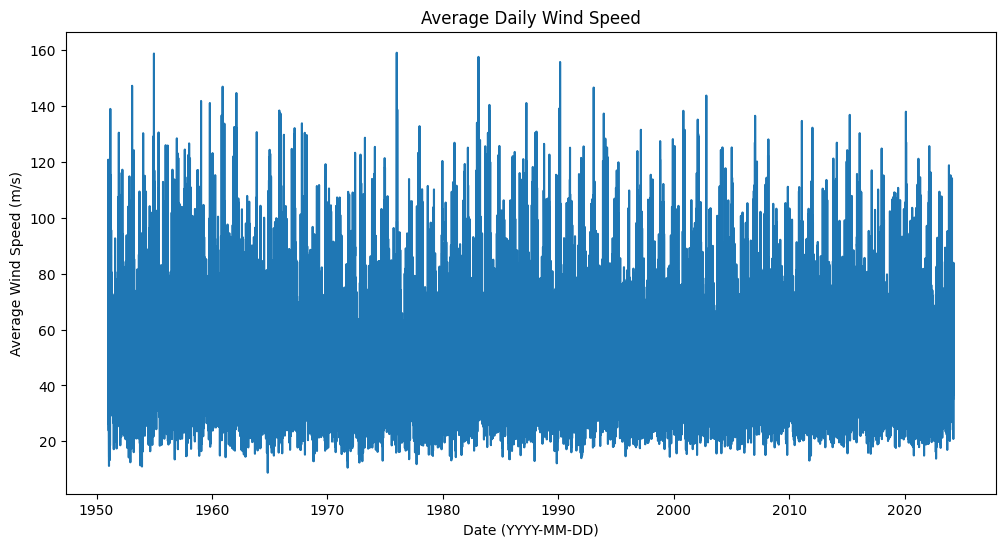

In [105]:
import matplotlib.pyplot as plt

daily_wind_speed = df.groupby(df['Date (YYYY-MM-DD)'].dt.date)['Hourly Average Wind Speed (m/s)'].mean()

# Plot
plt.figure(figsize=(12, 6))
daily_wind_speed.plot(title='Average Daily Wind Speed')
plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()

### Temperature

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and has been prepared as previously discussed
df['Date (YYYY-MM-DD)'] = pd.to_datetime(df['Date (YYYY-MM-DD)'])  # Ensure 'Date' is a datetime object
df['Month'] = df['Date (YYYY-MM-DD)'].dt.month  # Extract month for seasonal categorization

# Define months for each season
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
fall_months = [9, 10, 11]
winter_months = [12, 1, 2]

# Filter data by season
spring_data = df[df['Month'].isin(spring_months)]
summer_data = df[df['Month'].isin(summer_months)]
fall_data = df[df['Month'].isin(fall_months)]
winter_data = df[df['Month'].isin(winter_months)]

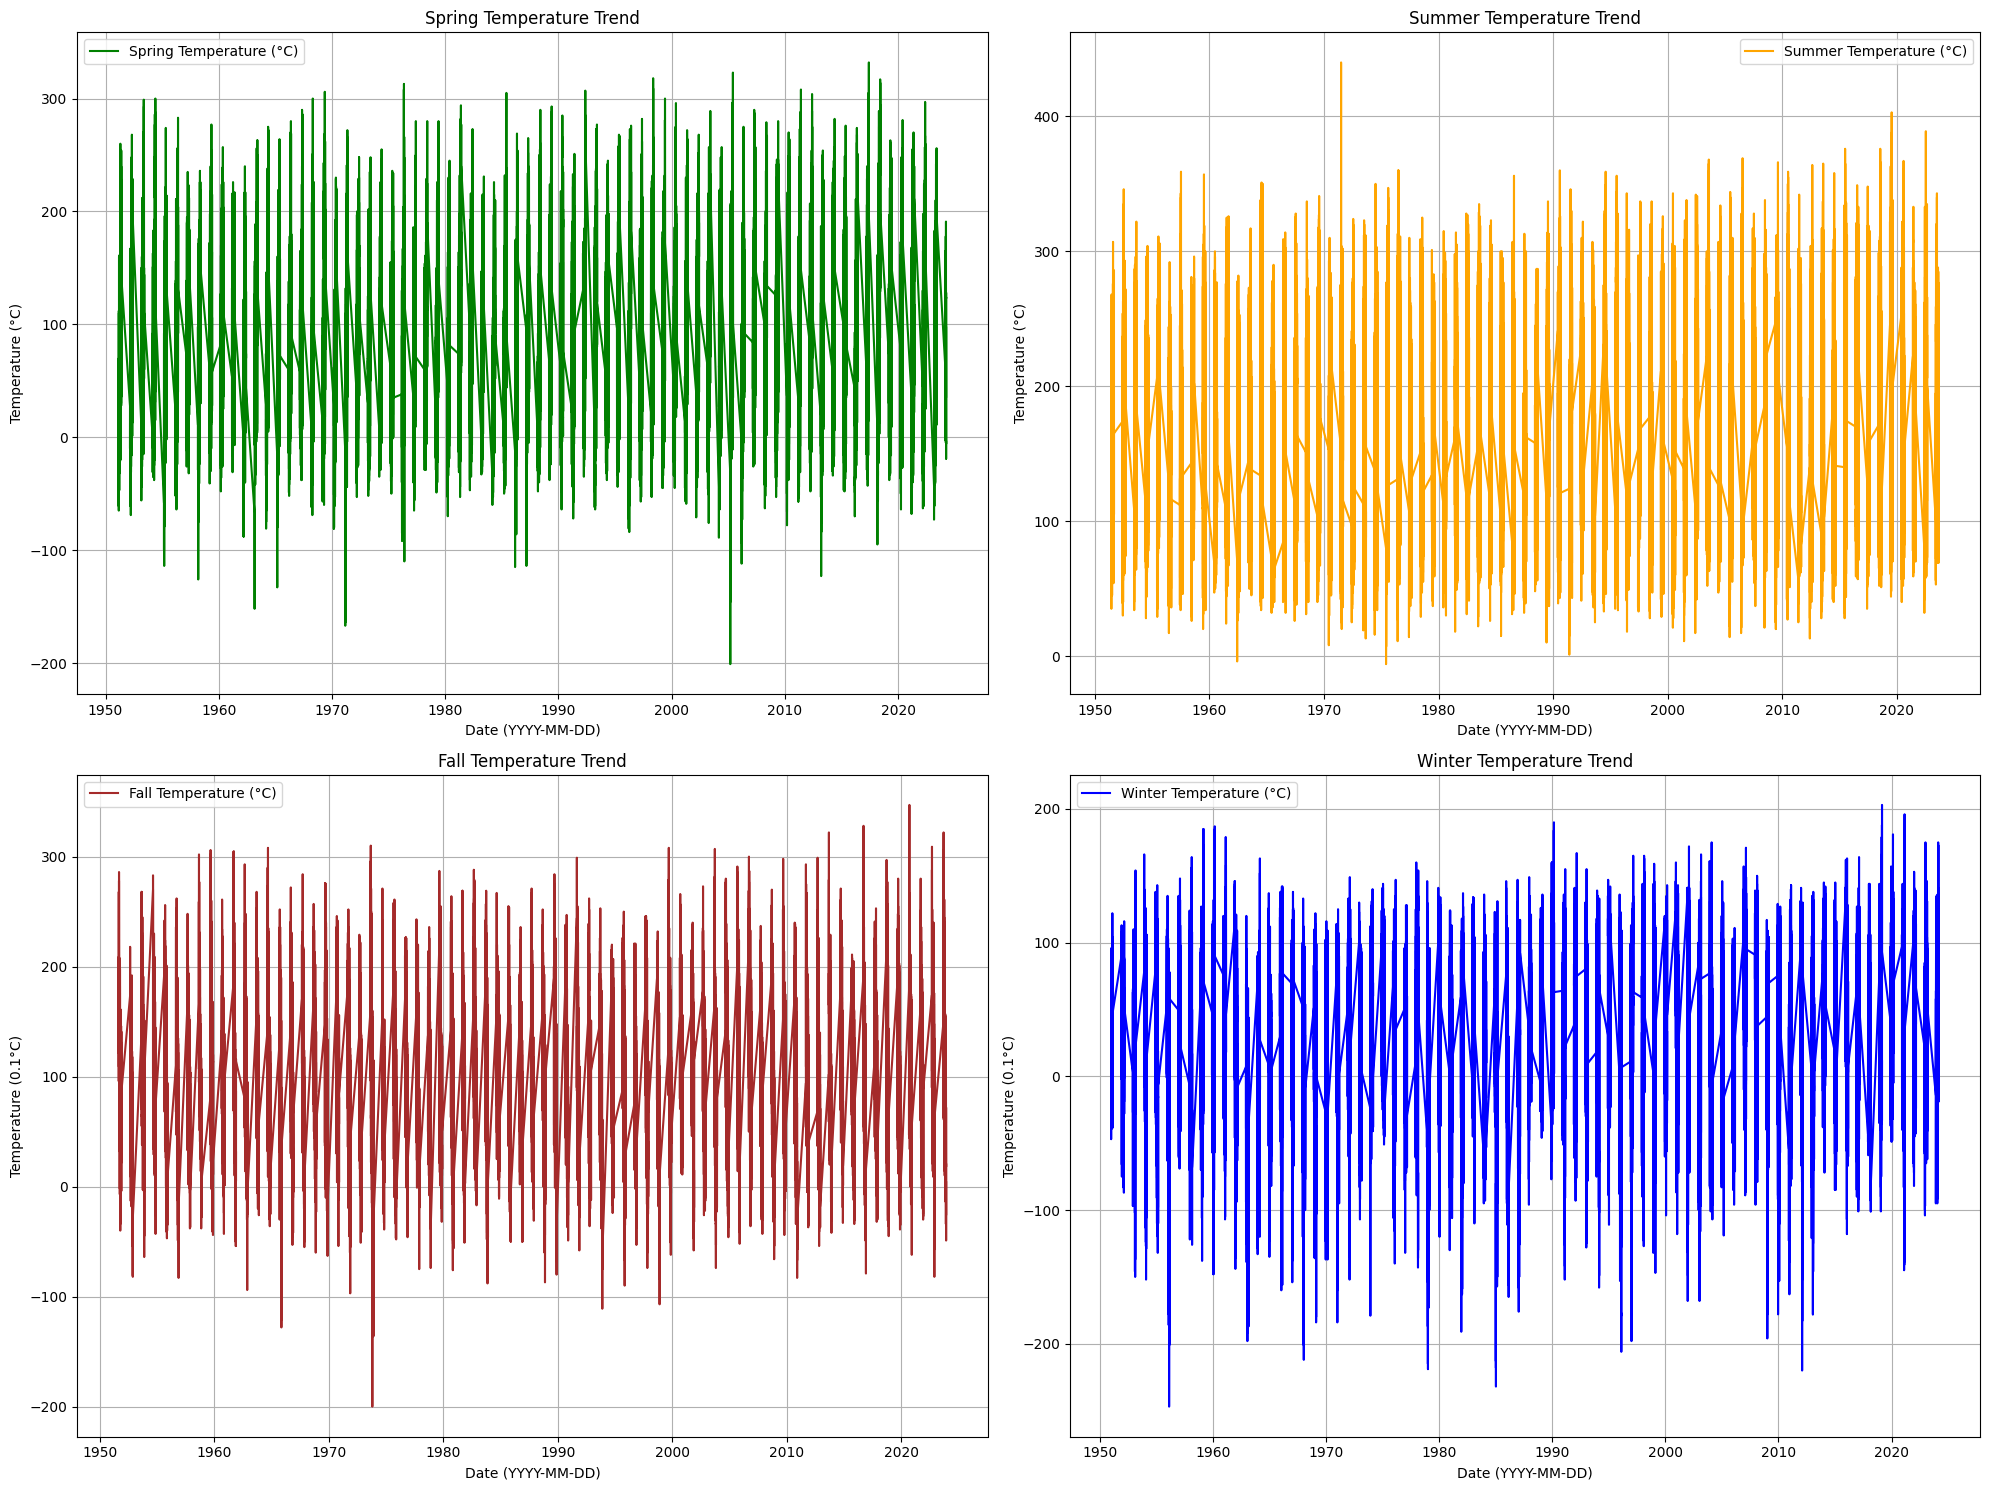

In [107]:
# Setup the plot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 15))  # Adjust size as needed

# Plot Temperature Trend for Spring
axs[0, 0].plot(spring_data['Date (YYYY-MM-DD)'], spring_data['Temperature (0.1°C)'], label='Spring Temperature (°C)', color='green')
axs[0, 0].set_title('Spring Temperature Trend')
axs[0, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot Temperature Trend for Summer
axs[0, 1].plot(summer_data['Date (YYYY-MM-DD)'], summer_data['Temperature (0.1°C)'], label='Summer Temperature (°C)', color='orange')
axs[0, 1].set_title('Summer Temperature Trend')
axs[0, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[0, 1].set_ylabel('Temperature (°C)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot Temperature Trend for Fall
axs[1, 0].plot(fall_data['Date (YYYY-MM-DD)'], fall_data['Temperature (0.1°C)'], label='Fall Temperature (°C)', color='brown')
axs[1, 0].set_title('Fall Temperature Trend')
axs[1, 0].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 0].set_ylabel('Temperature (0.1°C)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot Temperature Trend for Winter
axs[1, 1].plot(winter_data['Date (YYYY-MM-DD)'], winter_data['Temperature (0.1°C)'], label='Winter Temperature (°C)', color='blue')
axs[1, 1].set_title('Winter Temperature Trend')
axs[1, 1].set_xlabel('Date (YYYY-MM-DD)')
axs[1, 1].set_ylabel('Temperature (0.1°C)')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Missing data

In [108]:
nan_count = df.isna().sum()

print("\nNaN Count in each column:")
print(nan_count)


NaN Count in each column:
Date (YYYY-MM-DD)                           0
Station ID                                  0
Hour                                        0
Hourly Average Wind Speed (m/s)       2221137
Highest Wind Gust (m/s)                     0
Temperature (0.1°C)                         0
Duration of Precipitation (hours)     7516068
Precipitation Amount (mm)             7385292
Visibility (m)                        7268187
Weather Code                         10793640
Fog Indicator                               0
Rainfall Indicator                          0
Snow Indicator                              0
Thunderstorm Indicator                      0
Ice Formation Indicator                     0
Month                                       0
dtype: int64


In [109]:
df.fillna({
    'Hourly Average Wind Speed (m/s)': df['Hourly Average Wind Speed (m/s)'].median(),
    'Visibility (m)': df['Visibility (m)'].median()
}, inplace=True)

Here we can see the number of missing values in each column. Now, we would start cleaning them by firstly, understanding why the data is missing, and then replacing it. 

In [110]:
df.shape

(19188675, 16)

Starting with the Temparature and Wind speed, we can assume this is a MCAR (missing completely at random) and would replace the missing values with mean values from the previous years - lets not forget we have data until 1951.

In [111]:
df['Month'] = df['Date (YYYY-MM-DD)'].dt.month #extracting month and day
df['Day'] = df['Date (YYYY-MM-DD)'].dt.day


In [112]:
nan_count = df['Temperature (0.1°C)'].isna().sum()

print("\nNaN count in Temperature column:")
print(nan_count)


NaN count in Temperature column:
0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 17 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Date (YYYY-MM-DD)                  datetime64[ns]
 1   Station ID                         int64         
 2   Hour                               int64         
 3   Hourly Average Wind Speed (m/s)    float64       
 4   Highest Wind Gust (m/s)            object        
 5   Temperature (0.1°C)                float64       
 6   Duration of Precipitation (hours)  float64       
 7   Precipitation Amount (mm)          float64       
 8   Visibility (m)                     float64       
 9   Weather Code                       float64       
 10  Fog Indicator                      float64       
 11  Rainfall Indicator                 float64       
 12  Snow Indicator                     float64       
 13  Thunderstorm Indicator             float64       
 14  

In [114]:
print(df['Weather Code'].unique())

[nan  2.  3. 69.  1. 73. 27. 22. 81. 71.  5. 72. 70. 25. 20. 60. 61. 63.
 21. 68. 23.  0. 56. 24. 83. 26. 80. 87. 58. 28. 85. 50. 10. 51. 62. 77.
 46. 48. 42. 47. 44. 41. 40. 45. 43. 14. 79. 52. 18. 53. 15. 16. 84. 82.
 64. 29. 55. 11. 12.  9. 59. 88.  4. 95. 13. 17. 91. 89. 86. 49. 78. 92.
 93. 96.  6. 94. 65. 97. 67.  8. 99. 19. 90. 36. 76. 54. 66. 57. 38.  7.
 75. 37. 32. 30. 31. 74. 39. 98. 33. 35. 34.]


In [115]:
missing_rainfall = df.loc[df["Rainfall Indicator"].isna(), ["Station ID", "Hour","Weather Code", "Rainfall Indicator", "Snow Indicator", "Fog Indicator", "Ice Formation Indicator"]]
missing_rainfall

,Station ID,Hour,Weather Code,Rainfall Indicator,Snow Indicator,Fog Indicator,Ice Formation Indicator


### Stations Herwijnen, Maastricht, Volkel 
Below in the third dataset about different Weather station locations, we conducted that stations Herwijnen, Maastricht, Volkel  are the nearest to the cities our users travels to and from. The following stations have station ids respectivelly - 356, 375, 380 and this is why now we would try to understand more about specificaly them.

In [116]:
df['Station ID'].unique()

array([380, 310, 290, 280, 350, 370, 275, 240, 235, 210, 270, 260, 375,
       265, 344, 330, 225, 308, 331, 285, 312, 316, 348, 273, 356, 279,
       283, 269, 286, 391, 267, 343, 278, 277, 319, 340, 251, 248, 242,
       315, 313, 311, 324, 249, 377, 209, 257, 258, 323, 215])

Clearly here we can not only see the unique values for 'Station ID' but can also conclude that there are hidden characters and/or space that should be removed. 

In [117]:
#df['Station ID'] = df['Station ID'].str.replace(' ', '', regex=False)
#df['Station ID'].unique()

Also, lets check the values for the three nearest stations of the cities that regard our user journey - Herwijnen, Maastricht, Volkel.

In [118]:
station1 = df[df['Station ID'] == '356']
station2 = df[df['Station ID'] == '375']
station3 = df[df['Station ID'] == '380']

In [119]:
station1.value_counts().sum()

0

In [120]:
station2.value_counts().sum()

0

In [121]:
station3.value_counts().sum()

0

These represent the total value of data per each corresponding station or in total:

In [122]:
station_ids = ['356', '375', '380']

filtered_df = df[df['Station ID'].isin(station_ids)]

print(filtered_df.shape)

(0, 17)


In [123]:
for column in df:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for Date (YYYY-MM-DD):
Date (YYYY-MM-DD)
2014-12-09    1152
2012-08-20    1152
2012-08-09    1152
2012-08-10    1152
2012-08-11    1152
              ... 
1951-01-28     288
1951-01-29     288
1951-01-30     288
1951-01-31     288
1951-01-01     288
Name: count, Length: 26747, dtype: int64

Value counts for Station ID:
Station ID
310    641928
260    641928
290    641928
280    641928
350    641928
370    641928
275    641928
240    641928
235    641928
270    641928
375    641184
380    633174
344    591528
210    572712
265    493872
330    466632
225    466632
308    457872
285    378960
312    370200
316    361440
331    350640
348    332976
273    308832
356    302184
283    301135
279    300608
286    299505
269    299267
391    295721
267    295721
343    291312
278    291312
277    289488
319    287112
340    271608
251    261528
248    260328
242    250416
315    237984
313    237984
324    232152
249    219408
377    216840
209    202944
257    200760
311    1712

In [124]:
na_count_in_columns = df.isnull().sum()

print("Number of NaN values in each column:")
print(na_count_in_columns)

Number of NaN values in each column:
Date (YYYY-MM-DD)                           0
Station ID                                  0
Hour                                        0
Hourly Average Wind Speed (m/s)             0
Highest Wind Gust (m/s)                     0
Temperature (0.1°C)                         0
Duration of Precipitation (hours)     7516068
Precipitation Amount (mm)             7385292
Visibility (m)                              0
Weather Code                         10793640
Fog Indicator                               0
Rainfall Indicator                          0
Snow Indicator                              0
Thunderstorm Indicator                      0
Ice Formation Indicator                     0
Month                                       0
Day                                         0
dtype: int64


In order to analyze each Year and make comparisons, we would make a copy dataframe where the last 4 characters of 'Date (YYYY-MM-DD)'are removed in order to leave with only the year. 

In [125]:
df_sorted = df.copy()

df_sorted['Date (YYYY-MM-DD)'] = df_sorted['Date (YYYY-MM-DD)'].dt.year #removes the last 4 - the month and the date 
df_sorted = df_sorted.sort_values(by='Date (YYYY-MM-DD)', ascending=True)

df_sorted['Date (YYYY-MM-DD)'].value_counts()

Date (YYYY-MM-DD)
2012    421632
2013    420480
2015    420480
2011    420480
2006    419736
         ...  
1955    122640
1954    122640
1953    122640
1951    116064
2024     93840
Name: count, Length: 74, dtype: int64

#### Distribution of the data per each year

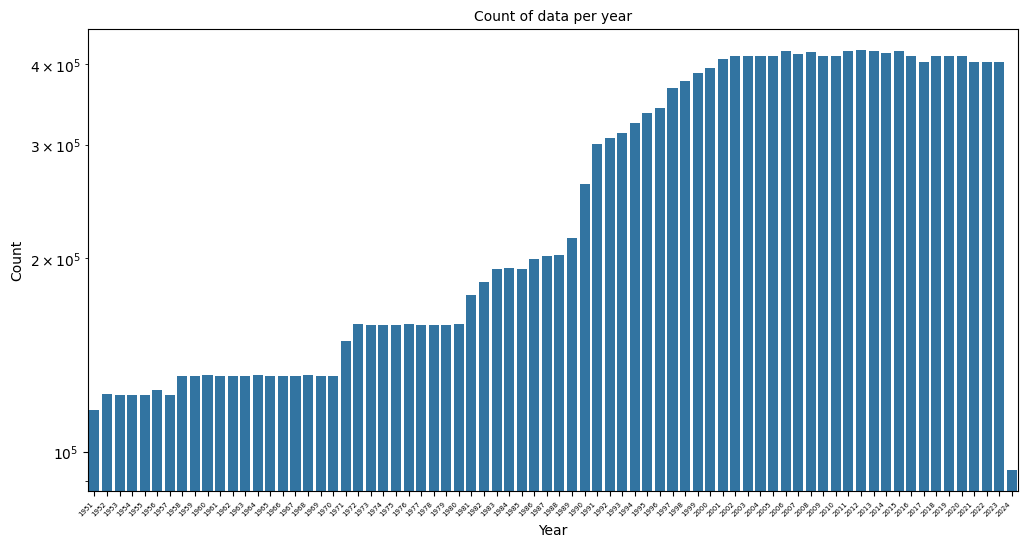

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))
sns.countplot(data=df_sorted, x='Date (YYYY-MM-DD)')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of data per year', fontsize=10)

plt.yscale('log')
plt.xticks(rotation=45, ha='right', fontsize=5) 
plt.show()

This plots represents the number of data for each year from 1951 until 2024. However, still 2024 is not over and this is why we lack of data there. 

In [127]:
df_sorted = df_sorted[df_sorted['Date (YYYY-MM-DD)'] >= 2015]

print(df_sorted)

          Date (YYYY-MM-DD)  Station ID  Hour  \
15693677               2015         391    17   
15693678               2015         391    16   
15693679               2015         391    15   
15693676               2015         391    19   
15693680               2015         391    14   
...                     ...         ...   ...   
19126110               2024         391    11   
19126109               2024         391    10   
19126108               2024         391     8   
19126106               2024         391     7   
19188674               2024         375     5   

          Hourly Average Wind Speed (m/s) Highest Wind Gust (m/s)   \
15693677                             20.0                       60   
15693678                             20.0                       50   
15693679                             30.0                       70   
15693676                             20.0                       60   
15693680                             30.0                    

In [128]:
df_sorted.shape

(3775320, 17)